# Import library for this project

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

# Read the CSV files into DataFrames


In [74]:
issues_df = pd.read_csv('issues.csv')
prs_df = pd.read_csv('prs.csv')
repos_df = pd.read_csv('repos.csv')
language_df = pd.read_csv('languages.csv')

# Merge all 3 CSV files into one DataFrame



In [75]:
merged_df = pd.merge(issues_df, prs_df, on=['name', 'year', 'quarter'], suffixes=('_issues', '_prs'))
final_merged_df = pd.merge(merged_df, repos_df, left_on='name', right_on='language')
final_merged_df.drop('language', axis=1, inplace=True)
complete_merged_df = pd.merge(final_merged_df, language_df, left_on='name', right_on='title')

# Drop the specified columns from the merged DataFrame and change year and quarter to object type

In [76]:
columns_to_drop = [
    'pldb_id', 'description', 'creators', 'website', 'isbndb', 'language_rank',
    'github_repo', 'github_repo_stars', 'github_repo_forks', 'github_repo_updated',
    'github_repo_subscribers', 'github_repo_created', 'github_repo_description',
    'github_repo_issues', 'github_repo_first_commit', 'github_language',
    'github_language_tm_scope', 'github_language_type', 'github_language_ace_mode',
    'github_language_file_extensions', 'title', 'appeared', 'domain_name',
    'domain_name_registered', 'reference', 'book_count', 'semantic_scholar',
    'wikipedia', 'wikipedia_daily_page_views', 'wikipedia_backlinks_count',
    'wikipedia_summary', 'wikipedia_page_id', 'wikipedia_appeared',
    'wikipedia_created', 'wikipedia_revision_count', 'wikipedia_related',
    'features_has_comments', 'features_has_semantic_indentation',
    'features_has_line_comments', 'line_comment_token', 'origin_community',
    'central_package_repository_count', 'file_type', 'is_open_source'
]
complete_merged_df.drop(columns=columns_to_drop, axis=1, inplace=True)
complete_merged_df['year'] = complete_merged_df['year'].astype('object')
complete_merged_df['quarter'] = complete_merged_df['quarter'].astype('object')

# Check for missing values

In [77]:
print(complete_merged_df.isnull().sum())

name                      0
year                      0
quarter                   0
count_issues              0
count_prs                 0
num_repos                 0
type                      0
github_language_repos    52
last_activity             0
number_of_users           0
number_of_jobs            0
dtype: int64


# Replace null values

In [78]:
complete_merged_df.fillna(0,inplace=True)

# Check the changes

In [79]:
print(complete_merged_df.isnull().sum())

name                     0
year                     0
quarter                  0
count_issues             0
count_prs                0
num_repos                0
type                     0
github_language_repos    0
last_activity            0
number_of_users          0
number_of_jobs           0
dtype: int64


# Display the first few rows to get a basic understanding of the data structure

In [80]:
complete_merged_df.head()

,name,year,quarter,count_issues,count_prs,num_repos,type,github_language_repos,last_activity,number_of_users,number_of_jobs
0,Ruby,2011,3,965,632,374802,pl,2659551.0,2022,357730,11438
1,Ruby,2011,4,4361,3047,374802,pl,2659551.0,2022,357730,11438
2,Ruby,2012,1,7317,37951,374802,pl,2659551.0,2022,357730,11438
3,Ruby,2012,2,18591,16616,374802,pl,2659551.0,2022,357730,11438
4,Ruby,2012,3,18847,17444,374802,pl,2659551.0,2022,357730,11438


# Shape of the dataframe

In [81]:
print("Shape of the data:",complete_merged_df.shape)


Shape of the data: (2459, 11)


# Data types


In [82]:
print(complete_merged_df.dtypes)

name                      object
year                      object
quarter                   object
count_issues               int64
count_prs                  int64
num_repos                  int64
type                      object
github_language_repos    float64
last_activity              int64
number_of_users            int64
number_of_jobs             int64
dtype: object


# Info of the data

In [83]:
a = complete_merged_df.describe()
b = complete_merged_df.describe(include=object)
print(a, "\n\n", b)

        count_issues      count_prs     num_repos  github_language_repos  \
count    2459.000000    2459.000000  2.459000e+03           2.459000e+03   
mean    12267.436356   15090.779585  1.059604e+05           1.337483e+06   
std     33027.621242   40396.437775  2.191425e+05           3.222217e+06   
min       100.000000     100.000000  7.000000e+00           0.000000e+00   
25%       327.500000     353.500000  3.306000e+03           1.396900e+04   
50%       979.000000    1289.000000  1.494900e+04           7.600100e+04   
75%      4867.000000    5744.000000  6.883300e+04           7.379480e+05   
max    341480.000000  397530.000000  1.100421e+06           1.604649e+07   

       last_activity  number_of_users  number_of_jobs  
count    2459.000000     2.459000e+03     2459.000000  
mean     2020.523790     6.747774e+05    10235.305409  
std         3.474267     1.508665e+06    21075.923174  
min      1998.000000     2.000000e+00        0.000000  
25%      2022.000000     1.726000e+

# Find the duplicates in the data

In [84]:
print("Duplicates in the data:",complete_merged_df.duplicated().sum())


Duplicates in the data: 0


# Distribution of numerical features

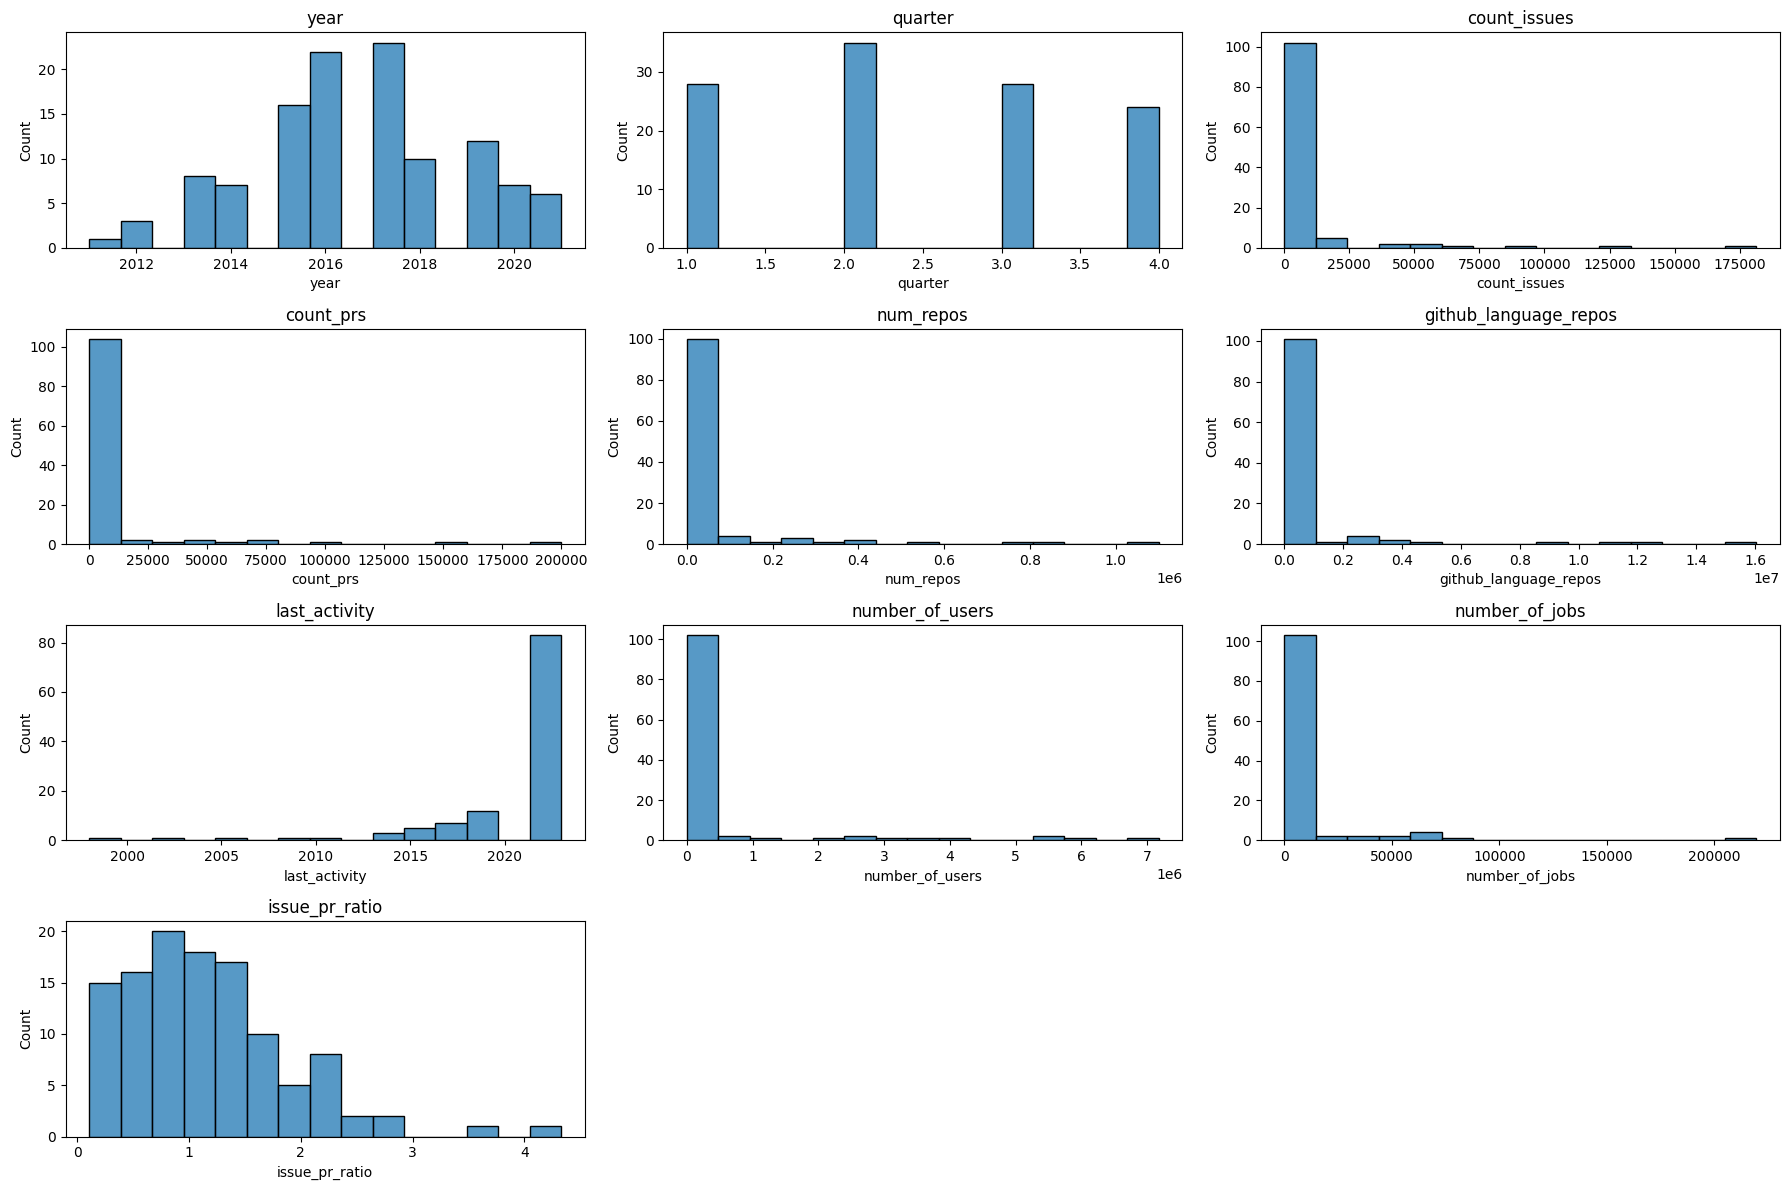

In [149]:
# Plot the distribution of numerical features
num_features = complete_merged_df.select_dtypes(include=[np.number]).columns
num_plots = len(num_features)
rows = 4
cols = 3

# Calculate the total number of subplots needed (which may be less than rows*cols)
total_subplots = min(rows * cols, num_plots)

plt.figure(figsize=(18, 12))  # Adjust the figure size as needed

for i in range(total_subplots):
    plt.subplot(rows, cols, i+1)  # Creates subplot for each feature
    feature = num_features[i]
    sn.histplot(complete_merged_df[feature], kde=False, bins=15)
    plt.title(feature)

plt.tight_layout()
plt.show()

# Plot of types of languages in the data

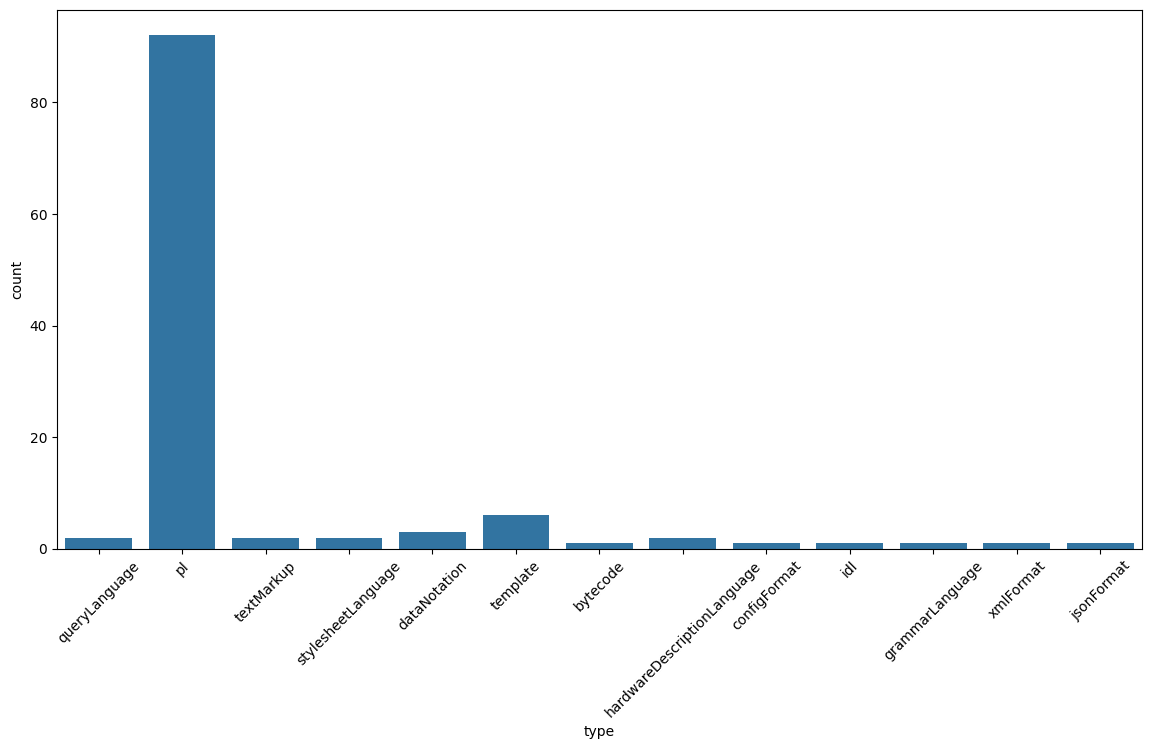

In [147]:
plt.figure(figsize=(14, 7))
sn.countplot(data=complete_merged_df, x='type')
plt.xticks(rotation=45)
plt.show()


# Distribution of repositories per language.

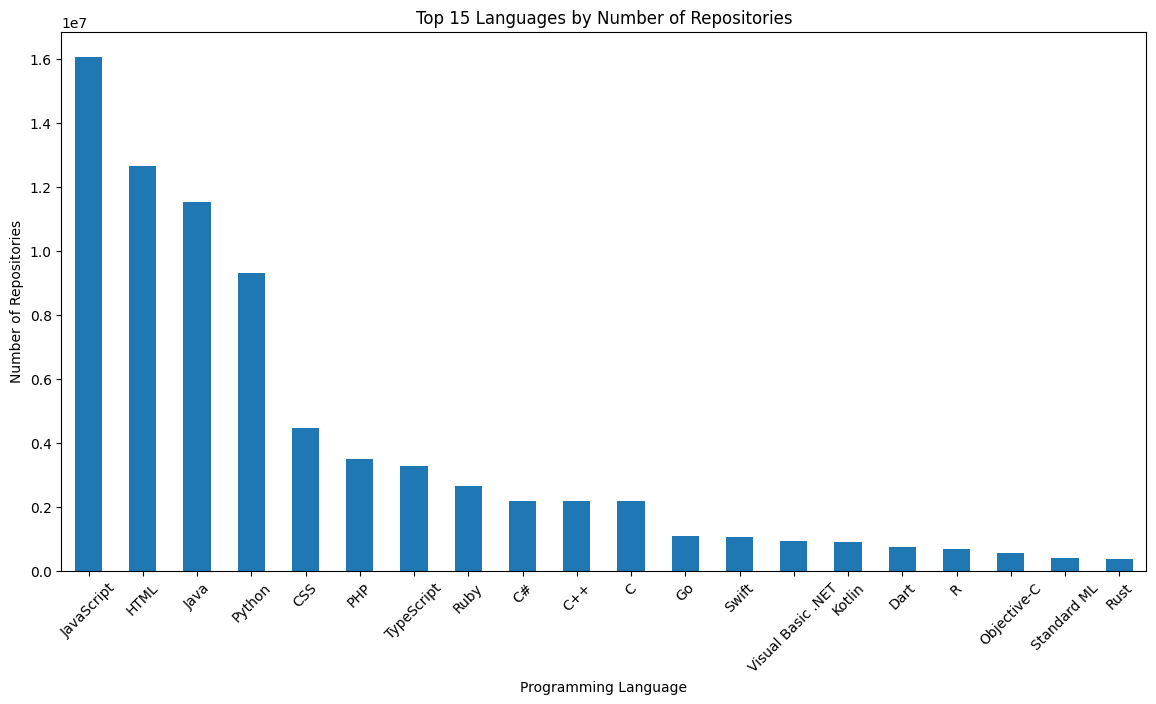

In [153]:
top_languages = complete_merged_df.groupby('name')['github_language_repos'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(14, 7))
top_languages.plot(kind='bar')

# Set the title and labels
plt.title('Top 15 Languages by Number of Repositories')
plt.xlabel('Programming Language')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=45)
plt.show()

# Determine the top 10 languages by total number of pull requests and issues

In [167]:
# Finding the top 10 languages by the total number of pull requests
top_languages_by_prs = complete_merged_df.groupby('name')['count_prs'].sum().sort_values(ascending=False).head(10)
print("Top 10 languages by pull requests:")
print(top_languages_by_prs)

# Finding the top 10 languages by the total number of issues
top_languages_by_issues = complete_merged_df.groupby('name')['count_issues'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 languages by issues:")
print(top_languages_by_issues)

Top 10 languages by pull requests:
name
JavaScript    200008
Java          157408
PHP           105055
Go             79150
C++            67634
Ruby           62378
TypeScript     42717
C#             41665
C              38042
Python         17288
Name: count_prs, dtype: int64

Top 10 languages by issues:
name
Java          181404
JavaScript    126962
PHP            94812
C++            68959
Go             57097
TypeScript     55301
C#             43028
C              37890
Python         21936
Ruby           18069
Name: count_issues, dtype: int64


 Languages like JavaScript and Java have very active communities with a lot of collaborative development work. Languages like Python have a higher number of issues relative to their pull requests, which could signal a variety of things including the need for more contributors to address open issues, or a large number of diverse applications leading to a wider range of problems being encountered and reported. It's also important to note that the number of pull requests and issues alone cannot fully describe the health or activity of a language's ecosystem, as the complexity of issues, the speed of resolution, and the size of the user base all play significant roles.

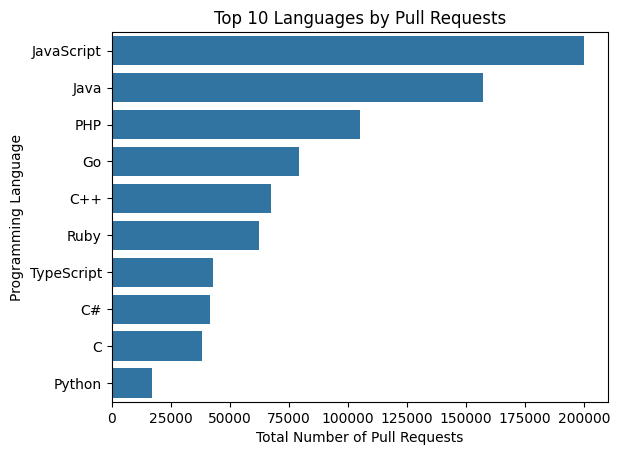

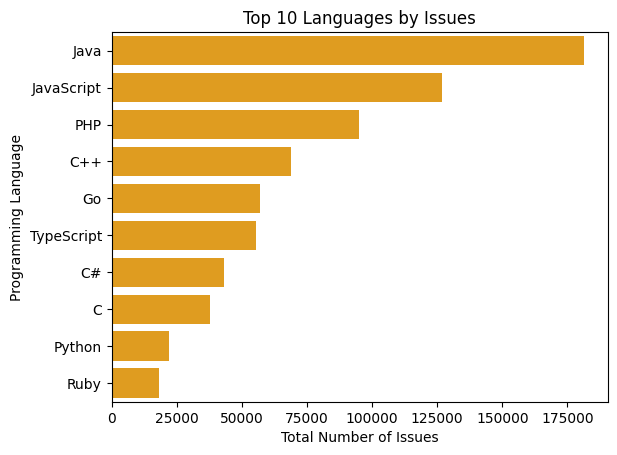

In [169]:
# Plot for top 10 languages by pull requests
sn.barplot(x=top_languages_by_prs.values, y=top_languages_by_prs.index)
plt.title('Top 10 Languages by Pull Requests')
plt.xlabel('Total Number of Pull Requests')
plt.ylabel('Programming Language')
plt.show()

# Plot for top 10 languages by issues
sn.barplot(x=top_languages_by_issues.values, y=top_languages_by_issues.index, color='orange')
plt.title('Top 10 Languages by Issues')
plt.xlabel('Total Number of Issues')
plt.ylabel('Programming Language')
plt.show()

#  The number of issues and pull requests has changed over time.

In [234]:
complete_merged_df['year_quarter'] = complete_merged_df['year'].astype(str) + 'Q' + complete_merged_df['quarter'].astype(str)
grouped_data = complete_merged_df.groupby('year_quarter').agg({'count_issues': 'sum', 'count_prs': 'sum'}).reset_index()
grouped_data = grouped_data.sort_values('year_quarter')
print("Changes in the number of issues and pull requests over time (by year and quarter):")
print(grouped_data)

Changes in the number of issues and pull requests over time (by year and quarter):
   year_quarter  count_issues  count_prs
0        2011Q4           111        149
1        2012Q2           202        128
2        2012Q3         22091      17397
3        2013Q1           123        107
4        2013Q2           573        538
5        2013Q3           544        486
6        2013Q4          2484       1930
7        2014Q1         11521       9277
8        2014Q2           277        543
9        2014Q3          2869       2622
10       2014Q4          1778        887
11       2015Q1          3426       2566
12       2015Q2          2315       2809
13       2015Q3         21652      17161
14       2015Q4           682        703
15       2016Q1         70032      68624
16       2016Q2         57587      44886
17       2016Q3          1056       1343
18       2016Q4          7486       6189
19       2017Q1         11426      13730
20       2017Q2        332240     323719
21       2017Q3

The data spans from the fourth quarter of 2011 through the fourth quarter of 2021.There are some quarters missing from the dataset (e.g., 2012Q1, 2021Q1), which could be due to a lack of data or no activity during those periods.

The volume of both issues and pull requests appears to be highly variable from quarter to quarter.
There are certain periods where there is a significant spike in activity. For instance, in 2012Q3, 2015Q3, 2016Q1, 2017Q2, 2018Q2, and 2019Q3, both issues and pull requests increase dramatically.


The most notable spikes occur in 2017Q2 and 2019Q3 where the counts for issues and pull requests are in the hundreds of thousands. This could be due to programming trend which everyone want to learn programming.

In the most recent years provided (2020-2021), there is a noticeable decrease in activity in the first few quarters listed, followed by a significant increase in 2021Q4 for pull requests. This could indicate a recent event or change in the project's lifecycle


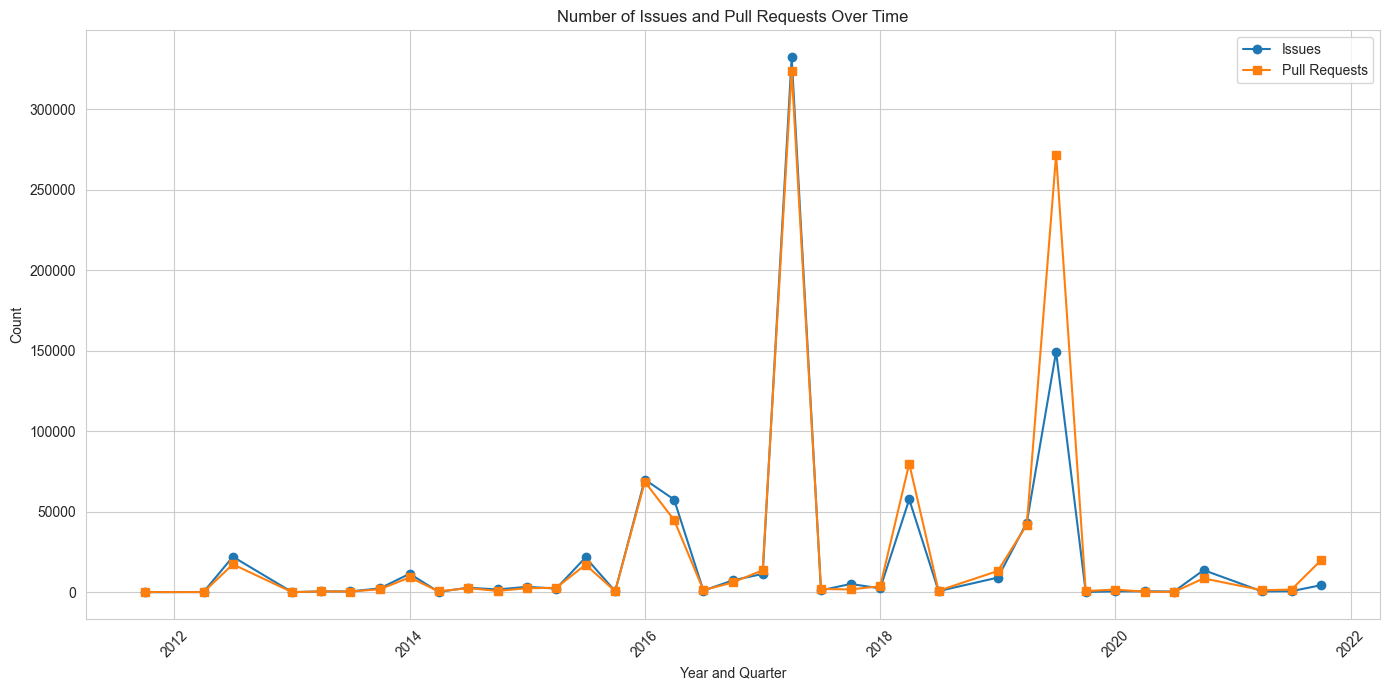

In [235]:
grouped_data['year_quarter'] = pd.PeriodIndex(grouped_data['year_quarter'], freq='Q').to_timestamp()
plt.figure(figsize=(14, 7))
plt.plot(grouped_data['year_quarter'], grouped_data['count_issues'], marker='o', label='Issues')
plt.plot(grouped_data['year_quarter'], grouped_data['count_prs'], marker='s', label='Pull Requests')
plt.title('Number of Issues and Pull Requests Over Time')
plt.xlabel('Year and Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Relationship between the number of pull requests and the number of issues.

In [202]:
# Calculate the Pearson correlation coefficient
correlation_matrix = complete_merged_df[['count_issues', 'count_prs']].corr()
print(correlation_matrix)

              count_issues  count_prs
count_issues      1.000000   0.951777
count_prs         0.951777   1.000000


The diagonal elements of the matrix are always 1, as any variable is perfectly correlated with itself. The off-diagonal element, which is the same in both the upper triangle and the lower triangle of the matrix, shows the correlation between count_issues and count_prs. In this case, the correlation coefficient is approximately 0.952, which indicates a very strong positive linear relationship between the number of issues and the number of pull requests. 


This high correlation suggests that, generally, as the number of issues increases, the number of pull requests also increases for the programming languages in this dataset. This could be interpreted as an indication of a healthy cycle of reporting problems (issues) and contributing solutions (pull requests) in the development ecosystem of these languages.

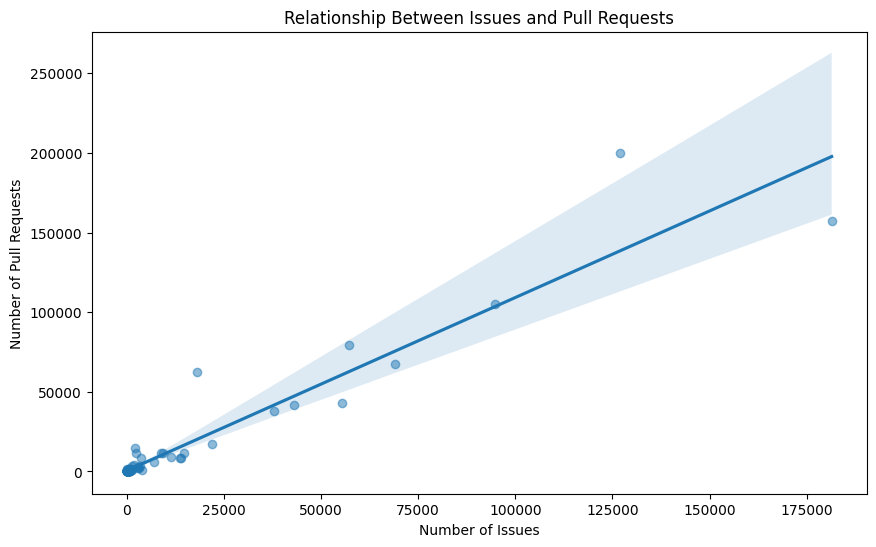

In [204]:
plt.figure(figsize=(10, 6))
sn.regplot(x='count_issues', y='count_prs', data=complete_merged_df, scatter_kws={'alpha':0.5})
plt.title('Relationship Between Issues and Pull Requests')
plt.xlabel('Number of Issues')
plt.ylabel('Number of Pull Requests')

# Show the plot
plt.show()

# Job Market Analysis

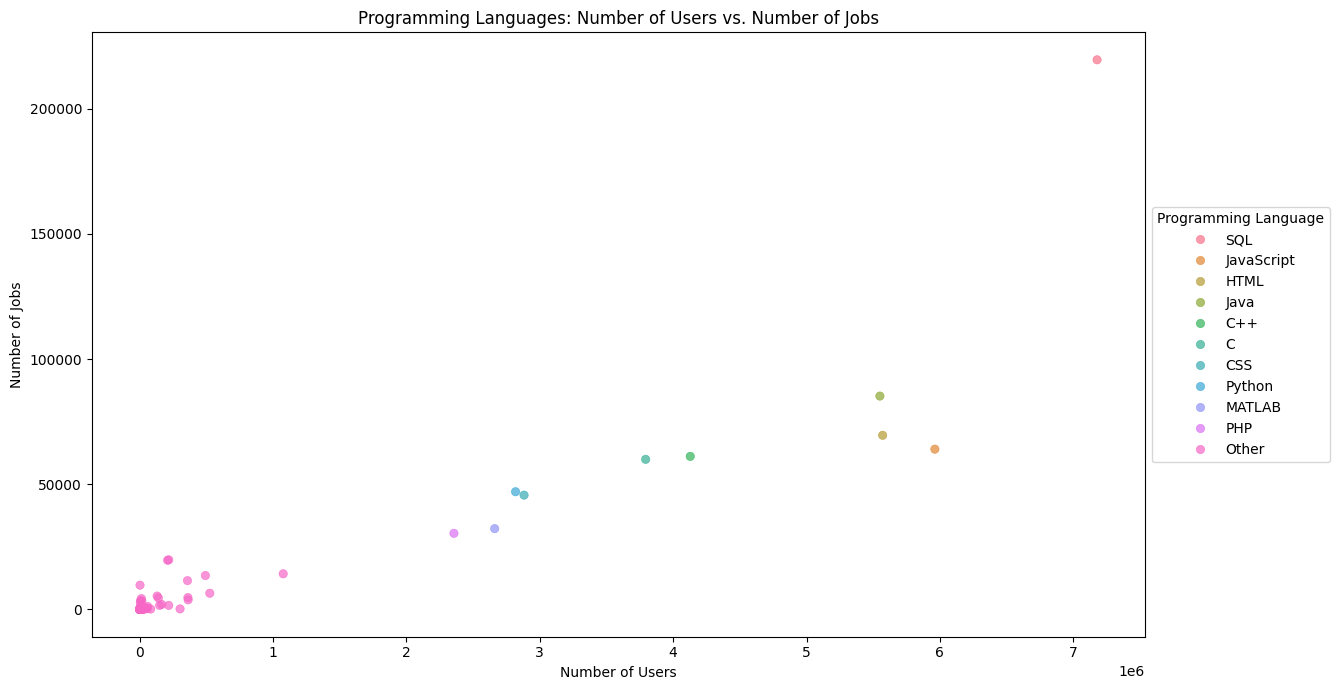

In [190]:
top_languages = complete_merged_df.groupby('name')['number_of_users'].sum().nlargest(10)
plt.figure(figsize=(18, 7))

# Create a new column 'label' that will be used for plotting
complete_merged_df['label'] = complete_merged_df.apply(
    lambda row: row['name'] if row['name'] in top_languages else 'Other',
    axis=1
)

# Create the scatter plot
scatter_plot = sn.scatterplot(
    data=complete_merged_df,
    x='number_of_users',
    y='number_of_jobs',
    hue='label',  # Use the new 'label' for the hue
    palette=sn.color_palette("husl", len(top_languages) + 1),  # Add one color for 'Other'
    edgecolor=None,
    alpha=0.7
)
plt.title('Number of Users vs. Number of Jobs based on Programming Language')
plt.xlabel('Number of Users')
plt.ylabel('Number of Jobs')
handles, labels = scatter_plot.get_legend_handles_labels()

# Filter out the handles and labels to keep only the top 10 languages and 'Other'
filtered_handles = [h for h, l in zip(handles, labels) if l in top_languages.index or l == 'Other']
filtered_labels = [l for l in labels if l in top_languages.index or l == 'Other']
plt.legend(filtered_handles, filtered_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Programming Language')
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

# Language Type Insights (Top 5 only)

In [228]:
top_language_types = complete_merged_df.groupby('type')['github_language_repos'].sum().nlargest(5).index
top_types_df = complete_merged_df[complete_merged_df['type'].isin(top_language_types)]
type_summaries = top_types_df.groupby('type').agg({
    'count_issues': 'sum',
    'count_prs': 'sum', 
    'number_of_jobs': 'sum'
}).reset_index()

type_summaries = type_summaries.sort_values(by='number_of_jobs', ascending=False)
type_summaries

,type,count_issues,count_prs,number_of_jobs
2,pl,818650,934475,504422
4,textMarkup,11687,9354,69531
3,stylesheetLanguage,2041,4947,45617
0,dataNotation,1427,2874,61
1,jsonFormat,3578,8441,0


While Programming language (pl) appears to be the most active and in-demand category, other language types such as textMarkup and stylesheetLanguage also show a healthy number of jobs, suggesting they are important skills in the industry. The dataNotation and jsonFormat categories, while active in issues and pull requests, do not show as many job listings, which may reflect their roles as complementary skills rather than primary job qualifications.

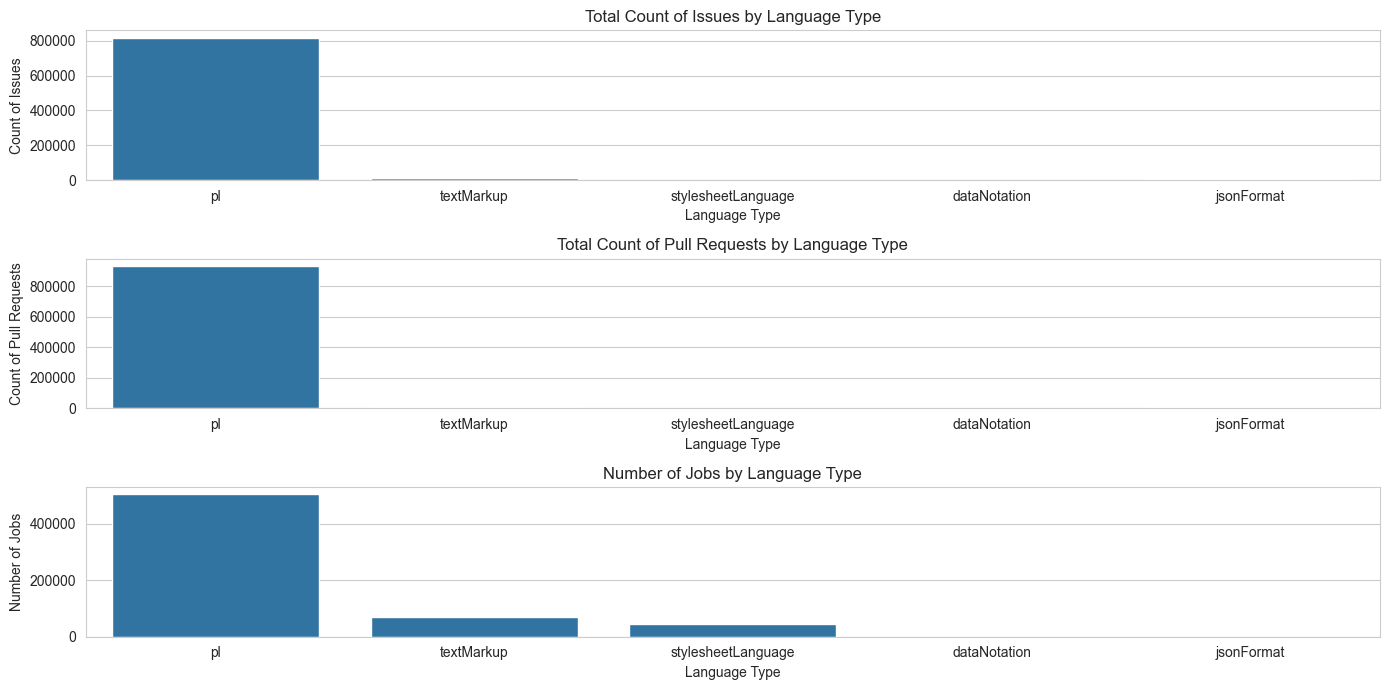

In [233]:
plt.figure(figsize=(14, 7))

# Create a bar plot for 'count_issues'
plt.subplot(3, 1, 1)
sn.barplot(x='type', y='count_issues', data=type_summaries)
plt.title('Total Count of Issues by Language Type')
plt.xlabel('Language Type')
plt.ylabel('Count of Issues')

# Create a bar plot for 'count_prs'
plt.subplot(3, 1, 2)
sn.barplot(x='type', y='count_prs', data=type_summaries)
plt.title('Total Count of Pull Requests by Language Type')
plt.xlabel('Language Type')
plt.ylabel('Count of Pull Requests')

# Create a bar plot for 'number_of_jobs'
plt.subplot(3, 1, 3)
sn.barplot(x='type', y='number_of_jobs', data=type_summaries)
plt.title('Number of Jobs by Language Type')
plt.xlabel('Language Type')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()